In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re


def format_greek_subscript(text: str) -> str:
    greek_letters = {
        "omega": "ω",  # ω
        "theta": "θ",  # θ
    }

    # Replace Greek letter names with symbols
    for name, symbol in greek_letters.items():
        text = re.sub(name, symbol, text)

    # Convert underscores to subscripts
    SUB = str.maketrans(
        "0123456789aehijklmniprstuvxy",
        "₀₁₂₃₄₅₆₇₈₉ₐₑₕᵢⱼₖₗₘₙᵢₚᵣₛₜᵤᵥₓᵧ",
    )

    def to_subscript(match):
        return match.group(1).translate(SUB)

    text = re.sub(r"_(\w+)", lambda m: "_" + to_subscript(m), text)
    text = text.replace("_", "")  # Remove remaining underscores

    return text


def plot_csv(ax, file_path, label=None, color=None):
    try:
        # Load the CSV file into a pandas DataFrame
        data = pd.read_csv(file_path)

        # Ensure the CSV has exactly two columns
        if len(data.columns) != 2:
            raise ValueError("CSV file must contain exactly two columns.")

        # Extract column names for x and y axes
        x_label = data.columns[0]
        y_label = data.columns[1]

        # Plot the data on the provided axes
        ax.plot(
            data[x_label],
            data[y_label],
            color=color,
            marker="",
            linestyle="-",
            label=label,
        )
    except Exception as e:
        print(f"An error occurred with {file_path}: {e}")


def iter_csv_files(path):
    for file in os.listdir(path):
        if file.endswith(".csv"):
            yield f"{path}/{file}"

def plot_csv_files(path, ax):
    for current_path in iter_csv_files(path):
        label = current_path.split("/")[-1].split(".")[0]
        label = format_greek_subscript(label)
        plot_csv(ax, current_path, label=label)

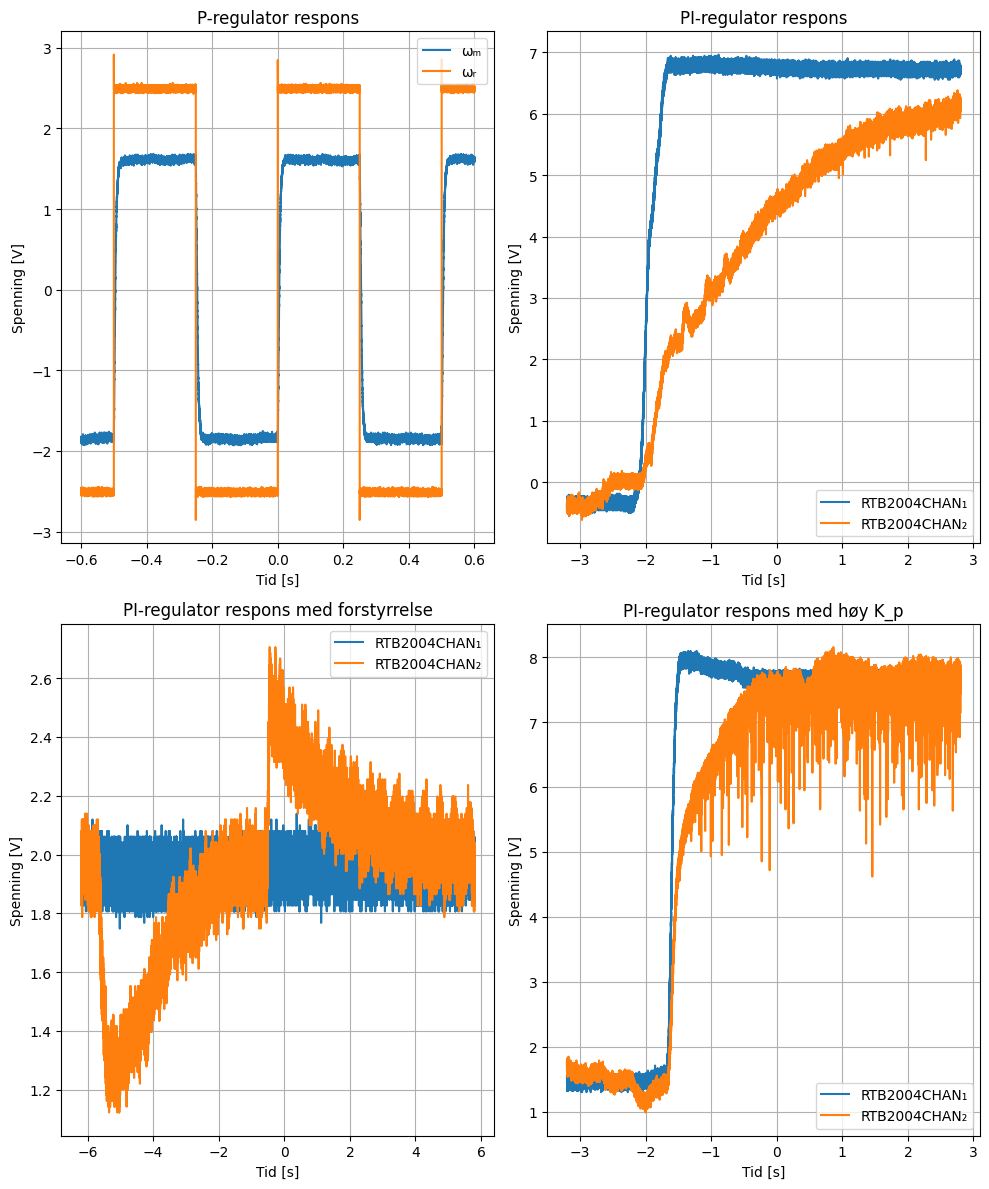

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))

# Plot the original path
plot_csv_files("3.6d", ax1)
ax1.set_title("P-regulator respons")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Spenning [V]")
ax1.legend()
ax1.grid(True)

# Plot the new path
plot_csv_files("4.3c-big-int", ax2)
ax2.set_title("PI-regulator respons")
ax2.set_xlabel("Tid [s]")
ax2.set_ylabel("Spenning [V]")
ax2.legend()
ax2.grid(True)

plot_csv_files("4.3c-big-int-disrupt", ax3)
ax3.set_title("PI-regulator respons med forstyrrelse")
ax3.set_xlabel("Tid [s]")
ax3.set_ylabel("Spenning [V]")
ax3.legend()
ax3.grid(True)

plot_csv_files("4.3c-small-int", ax4)
ax4.set_title("PI-regulator respons med høy Kₚ")
ax4.set_xlabel("Tid [s]")
ax4.set_ylabel("Spenning [V]")
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

fig.savefig(f"P-regulator-and-PI-regulator.png")